# Student Performance Analysis and Visualizations

## Topics 
1. Understanding dataset
2. Plotting pairplots for different features
3. Comparing attributes to specific feature
4. Plotting correlation heatmap
5. Calculating probabilities 
6. Checking for skewness
7. Finding sample and population mean 
8. Getting confidence intervals
9. Grouping data wrt feature
10. Comparing min, median, max of a particular feature wrt other features
11. Visualizing data of particular feature 
12. Comparing data of different features with graphs
13. Plotting graphs for certain scenarios 
14. Label Encoding
15. Data Preparation
16. Modelling aka fitting the data to different algorithms and evaluating the results
17. Radial Visualization for Target

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dabl #Data Analysis Baseline Library
import seaborn as sns

In [2]:
sns.set_style("darkgrid");

In [3]:
data = pd.read_csv("datasets/StudentsPerformance.csv")

## 1. Understanding the data 

In [4]:
data.shape

(1000, 8)

In [5]:
data.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [6]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## 2. Plotting pairplots for various features

**Gender**

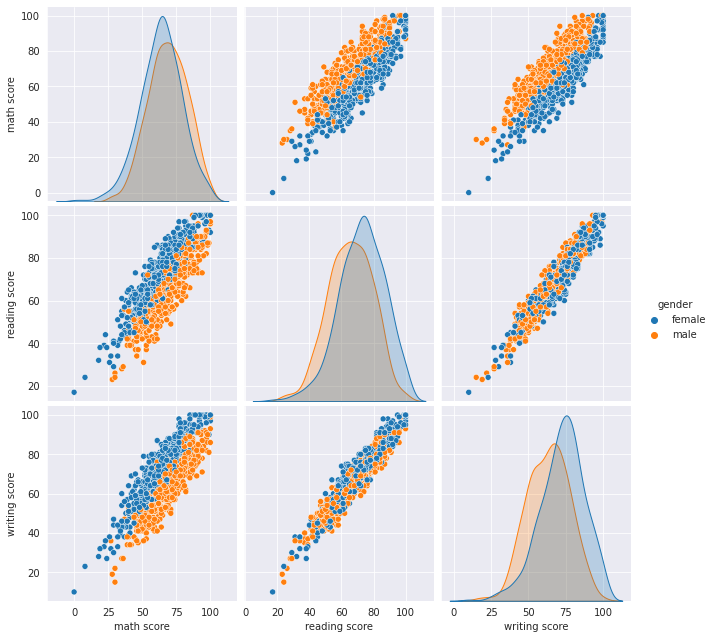

In [9]:
# Plotting a pairplot to see the relation between all the features sorting them in gender 
sns.pairplot(data, hue='gender', height=3);
plt.show()

**Race/Ethnicity**

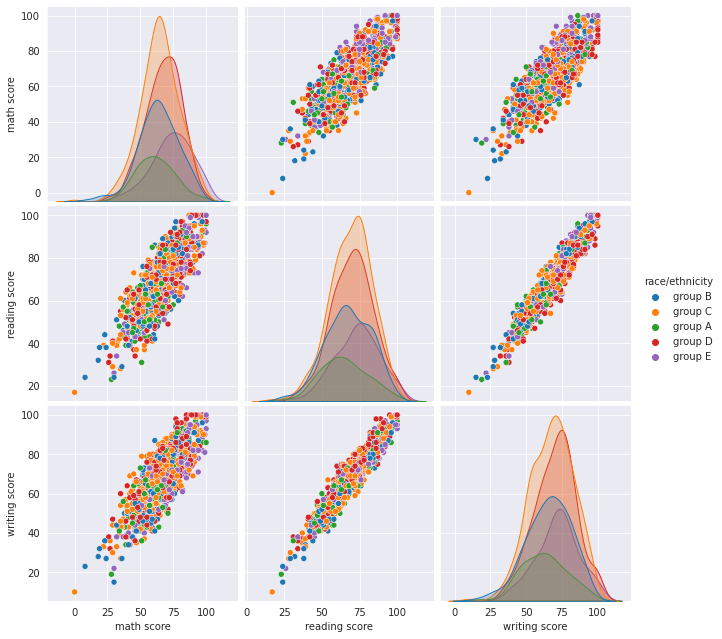

In [10]:
# Plotting a pairplot to see the relation between all the features sorting them in race/ethnicity
sns.pairplot(data, hue='race/ethnicity', height=3);
plt.show()

**Test preparation course**

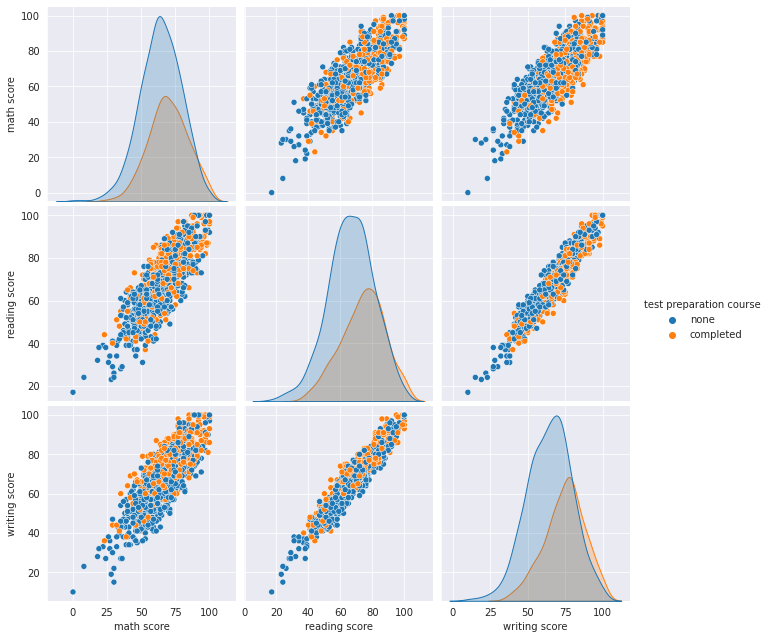

In [11]:
# Plotting a pairplot to see the relation between all the features sorting them in test preparation course
sns.pairplot(data, hue='test preparation course', height=3);
plt.show()

**Parental level of education**

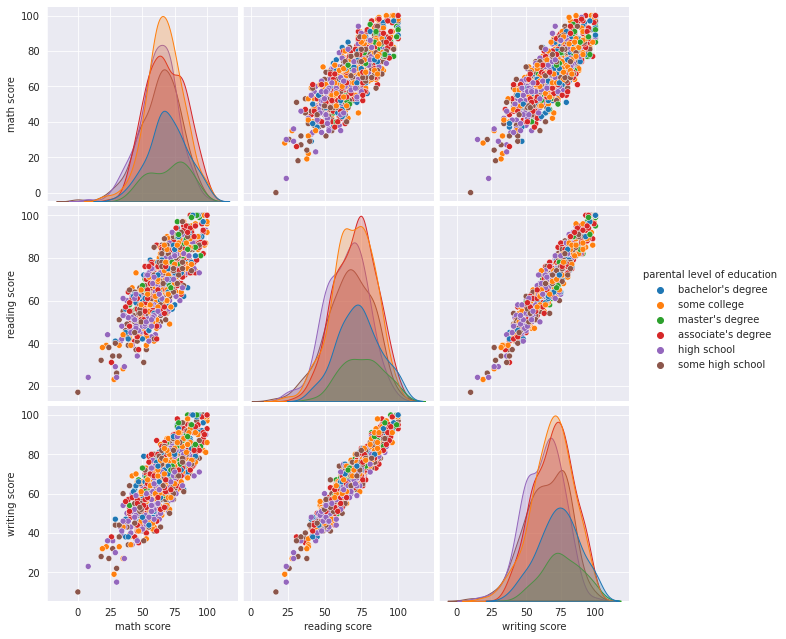

In [12]:
# Plotting a pairplot to see the relation between all the features sorting them on parental level of education
sns.pairplot(data, hue='parental level of education', height=3);
plt.show()

## 3. Comparing all other attributes wrt different scores
Done using dabl.
* Dabl first automatically identifies and drops any outliers present in the dataset. 
* It then identifies what type of data is present in the target (whether is categorical or continuous) and then displays the appropriate graph. 
* Dabl also calculates and displays Linear discriminant analysis scores for the training set. 

**Math Score**

Target looks like regression


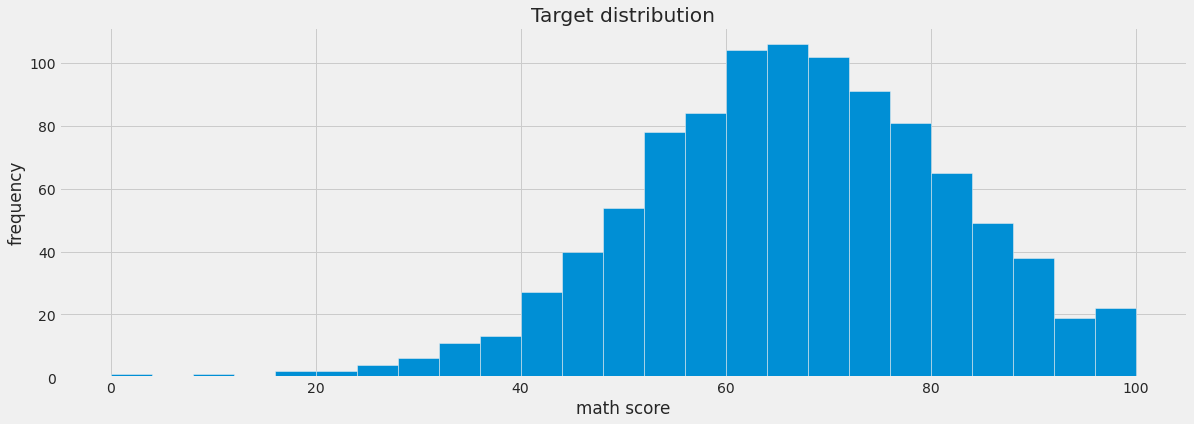

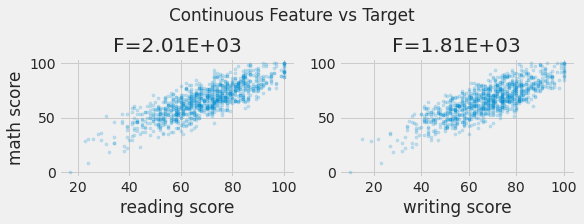

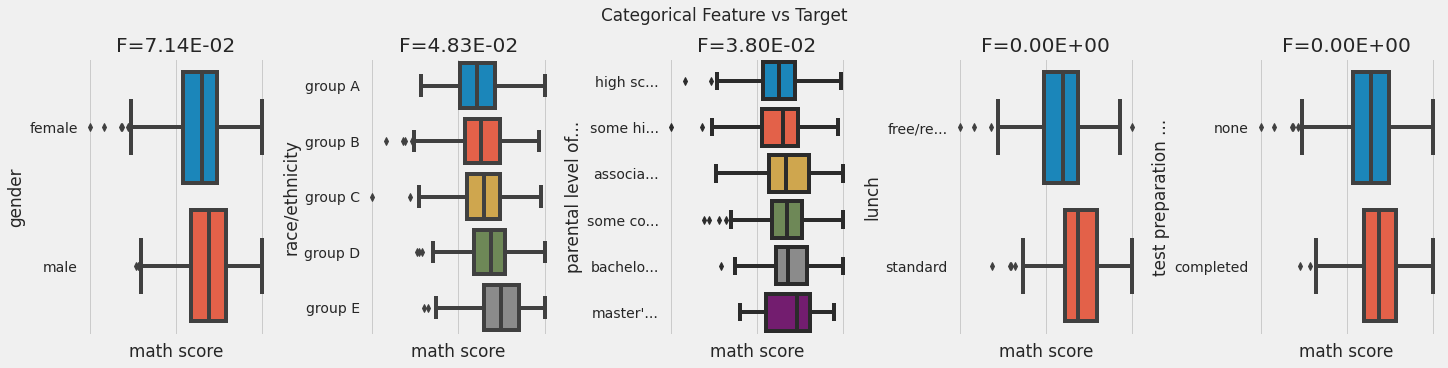

In [13]:
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (18, 6)
plt.style.use('fivethirtyeight')
dabl.plot(data, target_col = 'math score')

**Reading Score**

Target looks like regression


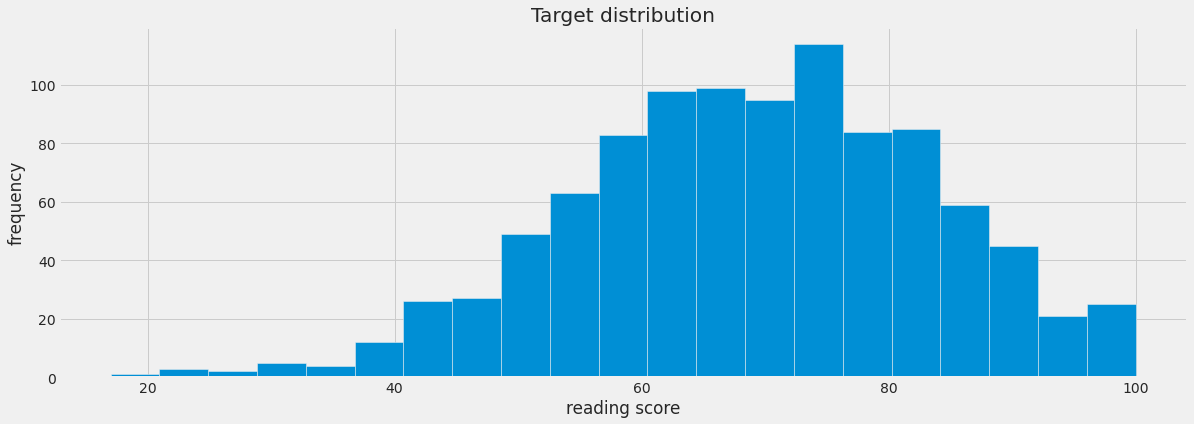

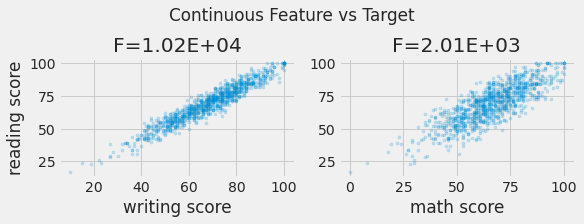

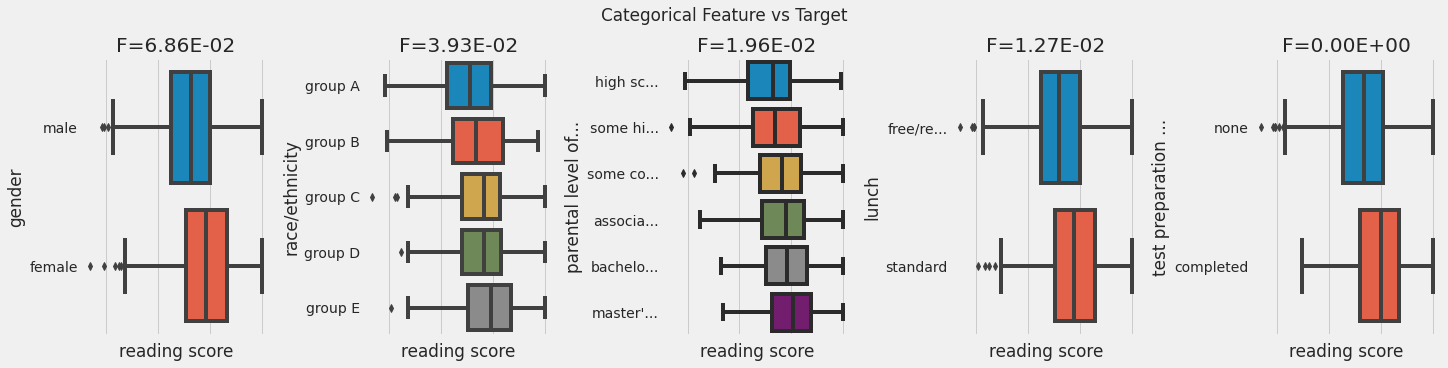

In [14]:
import warnings
warnings.filterwarnings('ignore')
dabl.plot(data, target_col = 'reading score')

**Writing Score**

Target looks like regression


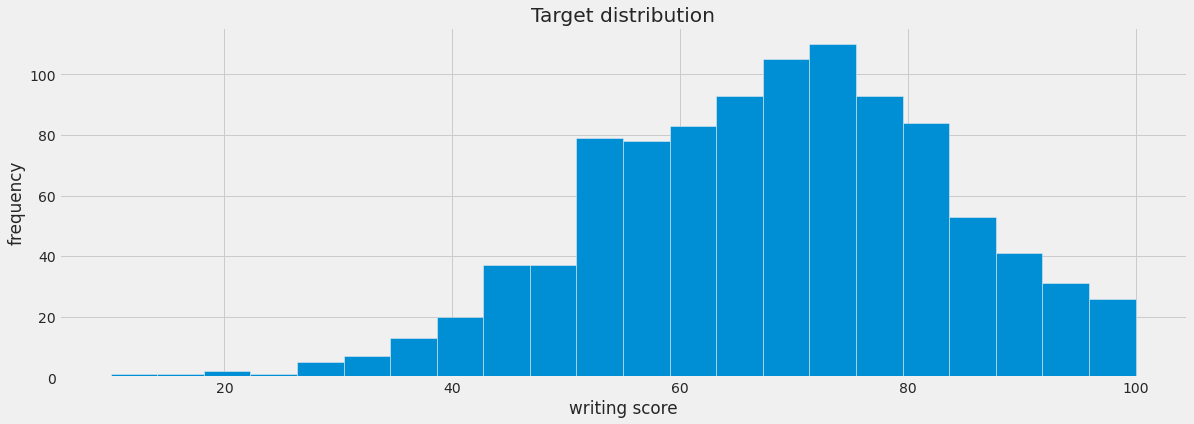

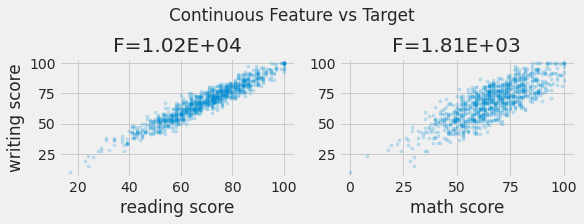

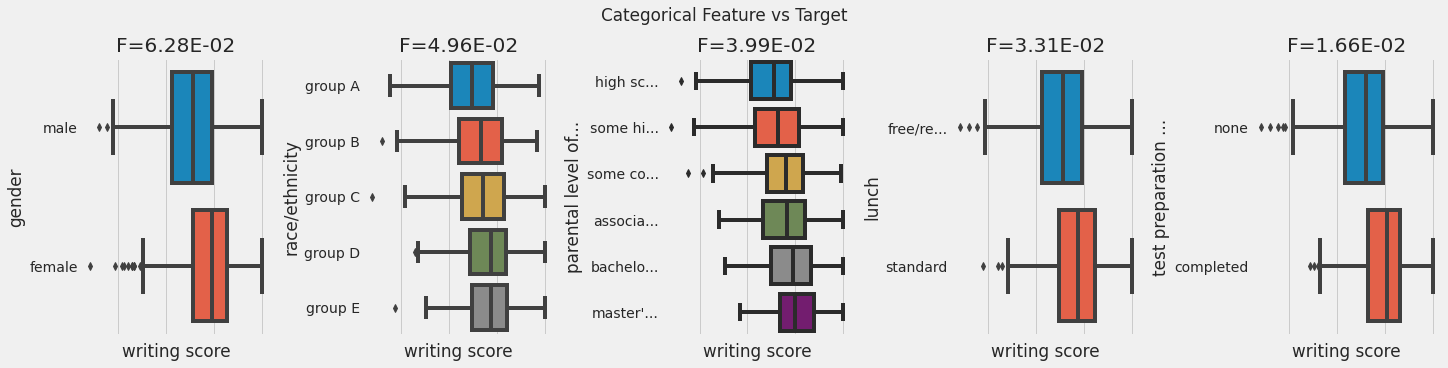

In [15]:
import warnings
warnings.filterwarnings('ignore')
dabl.plot(data, target_col = 'writing score')

## 4. Plotting heatmap for correlation 

In [16]:
data.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


<AxesSubplot:>

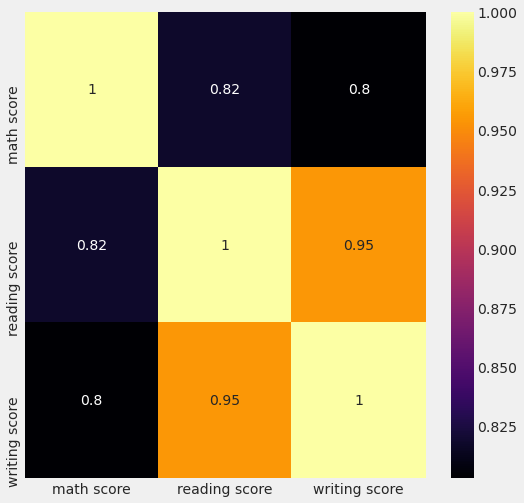

In [17]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(),annot=True,cmap='inferno')

## 5. Calculating Probabilities

In [18]:
total_students = data.shape[0]

**Student scoring more than 50 in maths, reading and writing**

In [19]:
math_more_50 = data[data['math score'] > 50].shape[0]
prob_math_more_50 = (math_more_50 / total_students) * 100

print("Probability of Maths = ",prob_math_more_50)

Probability of Maths =  85.0


In [20]:
reading_more_50 = data[data['reading score'] > 50].shape[0]
prob_reading_more_50 = (reading_more_50 / total_students) * 100

print("Probability of Reading = ",prob_reading_more_50)

Probability of Reading =  90.3


In [21]:
writing_more_50 = data[data['writing score'] > 50].shape[0]
prob_writing_more_50 = (writing_more_50 / total_students) * 100

print("Probability of Writing = ",prob_writing_more_50)

Probability of Writing =  87.6


**Passing all 3 subjects (> 40)**

In [22]:
passing_all = data[(data['math score'] > 40) & (data['writing score'] > 40) & (data['reading score'] > 40)].shape[0]

prob_passing_all = (passing_all / total_students) * 100

print("Probability of passing all the subjects = {0:.2f}".format(prob_passing_all))

Probability of passing all the subjects = 93.90


**Scoring more than 90 in all three subjects**

In [23]:
more_90_all = data[(data['math score'] > 90) & (data['writing score'] > 90) & (data['reading score'] > 90)].shape[0]

prob_more_90_all = (more_90_all / total_students) * 100

print("Probability of passing all the subjects = {0:.2f}".format(prob_more_90_all))

Probability of passing all the subjects = 2.30


## 6. Checking for Skewness for the Maths, Reading and Writing Scores

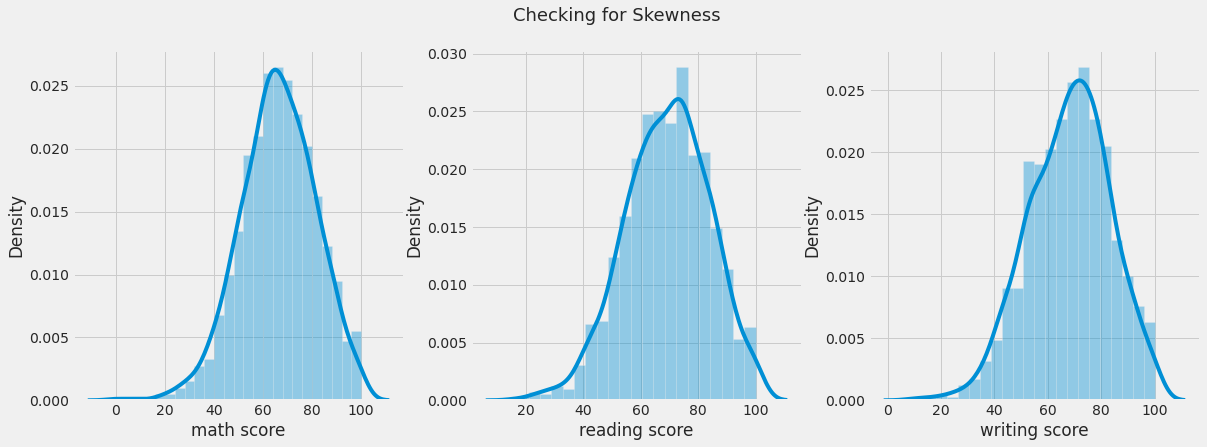

In [24]:
import warnings
warnings.filterwarnings('ignore')

plt.subplot(1, 3, 1)
sns.distplot(data['math score'])

plt.subplot(1, 3, 2)
sns.distplot(data['reading score'])

plt.subplot(1, 3, 3)
sns.distplot(data['writing score'])

plt.suptitle('Checking for Skewness', fontsize = 18)
plt.show()

***We see no skewness in the target features***

## 7. Sample and Population Mean
For Samples we will,
* Take seed so that everytime the random values come out to be constant
* Take 100 sample values from the dataset of 1000 values

In [25]:
np.random.seed(6)

sample_math_marks = np.random.choice(a= data['math score'], size=100)
print ("Sample mean for Math Scores:", sample_math_marks.mean() )          
print("Population mean for Math Scores:", data['math score'].mean())

sample_reading_marks = np.random.choice(a= data['reading score'], size=100)
print ("\nSample mean for Reading Scores:", sample_reading_marks.mean() )          
print("Population mean for Reading Scores:", data['reading score'].mean())

sample_writing_marks = np.random.choice(a= data['writing score'], size=100)
print ("\nSample mean for Writing Scores:", sample_math_marks.mean() )          
print("Population mean for Writing Scores:", data['writing score'].mean())

Sample mean for Math Scores: 63.12
Population mean for Math Scores: 66.089

Sample mean for Reading Scores: 68.5
Population mean for Reading Scores: 69.169

Sample mean for Writing Scores: 63.12
Population mean for Writing Scores: 68.054


## 8. Confidence Intervals
Using scipy.stats

In [26]:
import scipy.stats as stats
import math

np.random.seed(10)
sample_size = 1000

**Math Score**

In [27]:
sample = np.random.choice(a= data['math score'],size = sample_size)
sample_mean = sample.mean()

# Z-Value
z_critical = stats.norm.ppf(q = 0.95)                                 

# Population standard deviation
pop_stdev = data['math score'].std()  

# Margin of error
margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size)) 

# Confidence interval
confidence_interval = (sample_mean - margin_of_error,sample_mean + margin_of_error)  

print("z-critical value: ",z_critical) 
print("Confidence interval:",confidence_interval)
print("True mean: {}".format(data['math score'].mean()))

z-critical value:  1.6448536269514722
Confidence interval: (64.82729483328328, 66.40470516671672)
True mean: 66.089


**Reading Score**

In [28]:
sample = np.random.choice(a= data['reading score'],size = sample_size)
sample_mean = sample.mean()

# Z-Value
z_critical = stats.norm.ppf(q = 0.95)                                 

# Population standard deviation
pop_stdev = data['reading score'].std()  

# Margin of error
margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size)) 

# Confidence interval
confidence_interval = (sample_mean - margin_of_error,sample_mean + margin_of_error)  

print("z-critical value: ",z_critical) 
print("Confidence interval:",confidence_interval)
print("True mean: {}".format(data['reading score'].mean()))

z-critical value:  1.6448536269514722
Confidence interval: (68.80157337011646, 70.32042662988356)
True mean: 69.169


**Writing Score**

In [29]:
sample = np.random.choice(a= data['writing score'],size = sample_size)
sample_mean = sample.mean()

# Z-Value
z_critical = stats.norm.ppf(q = 0.95)                                 

# Population standard deviation
pop_stdev = data['writing score'].std()  

# Margin of error
margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size)) 

# Confidence interval
confidence_interval = (sample_mean - margin_of_error,sample_mean + margin_of_error)  

print("z-critical value: ",z_critical) 
print("Confidence interval:",confidence_interval)
print("True mean: {}".format(data['writing score'].mean()))

z-critical value:  1.6448536269514722
Confidence interval: (67.74860035030862, 69.32939964969138)
True mean: 68.054


## 9. Grouping scores above 90

**Girls**

In [30]:
data[(data['gender'] == 'female') & (data['math score'] > 90) & (data['writing score'] > 90) & (data['reading score'] > 90)]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
114,female,group E,bachelor's degree,standard,completed,99,100,100
165,female,group C,bachelor's degree,standard,completed,96,100,100
179,female,group D,some high school,standard,completed,97,100,100
451,female,group E,some college,standard,none,100,92,97
458,female,group E,bachelor's degree,standard,none,100,100,100
546,female,group A,some high school,standard,completed,92,100,97
566,female,group E,bachelor's degree,free/reduced,completed,92,100,100
594,female,group C,bachelor's degree,standard,completed,92,100,99
685,female,group E,master's degree,standard,completed,94,99,100
712,female,group D,some college,standard,none,98,100,99


**Boys**

In [31]:
data[(data['gender'] == 'male') & (data['math score'] > 90) & (data['writing score'] > 90) & (data['reading score'] > 90)]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
149,male,group E,associate's degree,free/reduced,completed,100,100,93
571,male,group A,bachelor's degree,standard,none,91,96,92
625,male,group D,some college,standard,completed,100,97,99
864,male,group C,associate's degree,standard,none,97,93,91
916,male,group E,bachelor's degree,standard,completed,100,100,100
919,male,group B,some college,standard,completed,91,96,91


## 10. Comparing performance of boys and girls

In [32]:
data.groupby(['gender']).agg(['min','median','max'])

math score             reading score             writing score         \
              min median  max           min median  max           min median   
gender                                                                         
female          0     65  100            17     73  100            10     74   
male           27     69  100            23     66  100            15     64   

             
        max  
gender       
female  100  
male    100

**With respect to Lunch**

In [33]:
data[['lunch','gender','math score','writing score','reading score']].groupby(['lunch','gender']).agg(['min','median','max'])

math score             writing score              \
                           min median  max           min median  max   
lunch        gender                                                    
free/reduced female          0     57   93            10     68  100   
             male           27     62  100            15     59   93   
standard     female         19     67  100            30     76  100   
             male           30     72  100            22     67  100   

                    reading score              
                              min median  max  
lunch        gender                            
free/reduced female            17   67.0  100  
             male              23   61.0  100  
standard     female            29   75.0  100  
             male              26   67.5  100

**With respect to Test Preparation**

In [34]:
data[['test preparation course','gender','math score','writing score','reading score']].groupby(['test preparation course','gender']).agg(['min','median','max'])

math score             writing score         \
                                      min median  max           min median   
test preparation course gender                                               
completed               female         23     67   99            36     79   
                        male           39     73  100            38     70   
none                    female          0     62  100            10     70   
                        male           27     67   97            15     60   

                                    reading score              
                                max           min median  max  
test preparation course gender                                 
completed               female  100            40     78  100  
                        male    100            37     71  100  
none                    female  100            17     71  100  
                        male     92            23     63   96

**With respect to Race and Ethnicity**

In [35]:
data[['race/ethnicity','gender','math score','writing score','reading score']].groupby(['race/ethnicity','gender']).agg(['min','median','max'])

math score             writing score              \
                             min median  max           min median  max   
race/ethnicity gender                                                    
group A        female         34     57   92            41   67.0   97   
               male           28     63  100            19   60.0   92   
group B        female          8     62   97            23   71.5   96   
               male           30     65   94            15   60.0   92   
group C        female          0     63   96            10   74.0  100   
               male           27     68   98            27   62.0   95   
group D        female         26     65   98            32   76.0  100   
               male           39     71  100            34   67.0   99   
group E        female         32     71  100            38   76.0  100   
               male           30     78  100            22   70.0  100   

                      reading score              
                                min median  max  
race/ethnicity gender                            
group A        female            43   67.5  100  
               male              23   61.0   96  
group B        female            24   71.5   97  
               male              24   62.0   96  
group C        female            17   73.0  100  
               male              28   66.0  100  
group D        female            31   74.0  100  
               male              34   68.0   97  
group E        female            34   76.0  100  
               male              26   73.0  100

## 11. Visualizing data of each feature

In [36]:
plt.rcParams['figure.figsize'] = (15, 5)

**Males and Females**

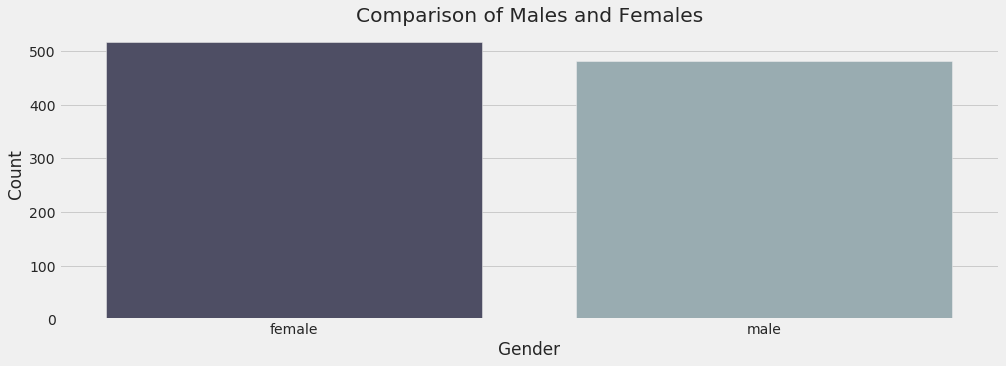

In [37]:
plt.style.use('_classic_test_patch')
sns.countplot(x=data['gender'],palette = 'bone')
plt.title('Comparison of Males and Females', fontweight = 30)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

**The different groups**

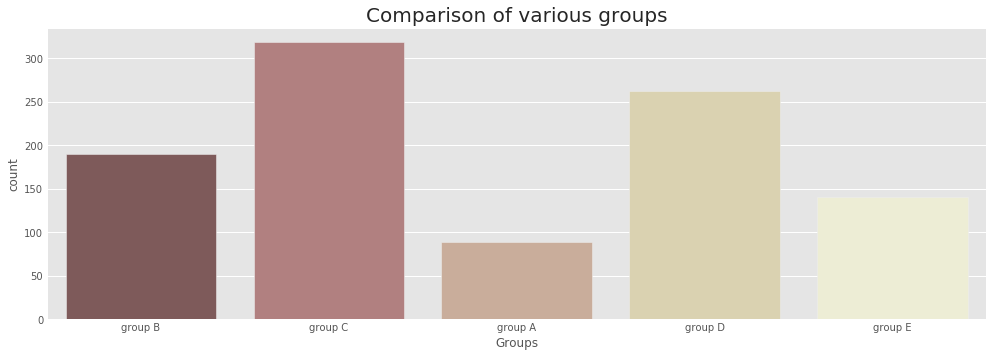

In [38]:
plt.style.use('ggplot')
sns.countplot(x=data['race/ethnicity'], palette = 'pink')
plt.title('Comparison of various groups', fontweight = 30, fontsize = 20)
plt.xlabel('Groups')
plt.ylabel('count')
plt.show()

**Parental education levels**

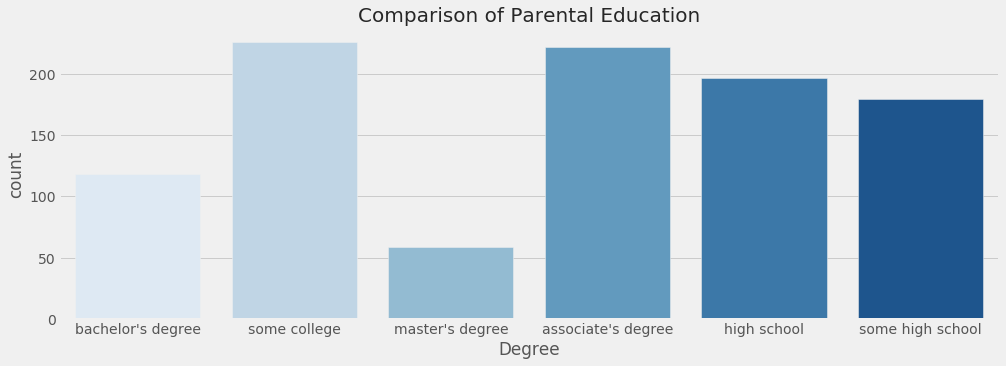

In [39]:
plt.style.use('fivethirtyeight')
sns.countplot(x=data['parental level of education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

**Types of lunch**

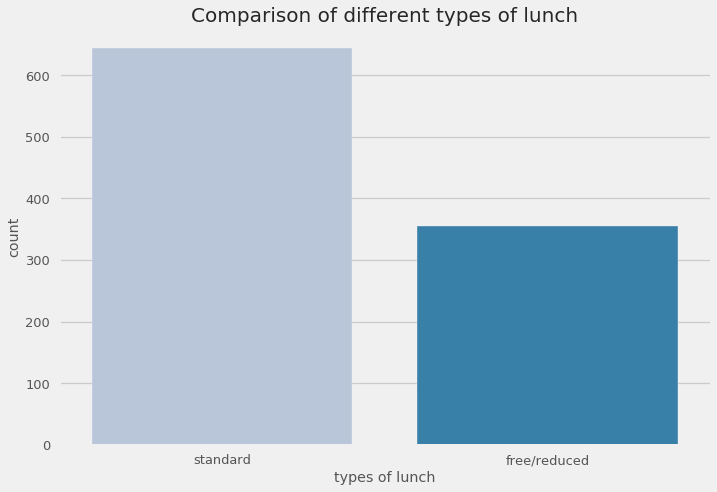

In [40]:
plt.style.use('seaborn-talk')
sns.countplot(x=data['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

**Math scores**

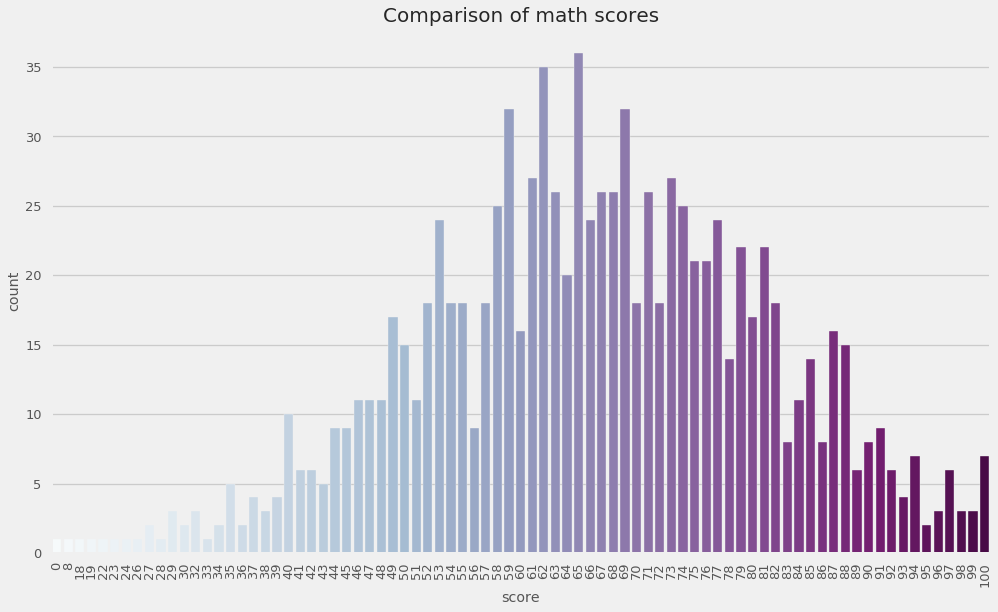

In [41]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('tableau-colorblind10')
sns.countplot(x=data['math score'], palette = 'BuPu')
plt.title('Comparison of math scores', fontweight = 30, fontsize = 20)
plt.xlabel('score')
plt.ylabel('count')
plt.xticks(rotation = 90)
plt.show()

**Reading Scores**

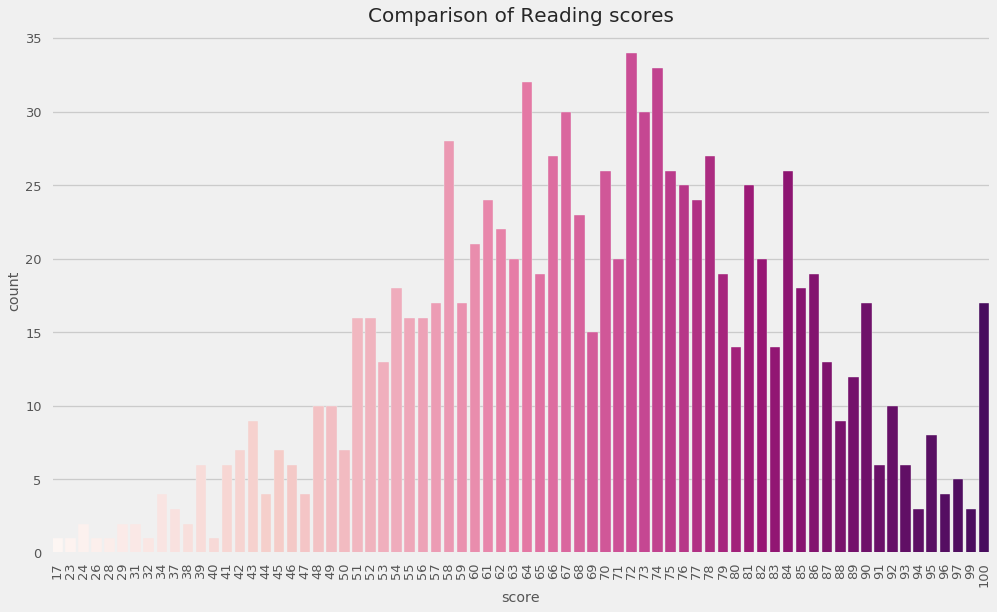

In [42]:
sns.countplot(x=data['reading score'], palette = 'RdPu')
plt.title('Comparison of Reading scores', fontweight = 30, fontsize = 20)
plt.xlabel('score')
plt.ylabel('count')
plt.xticks(rotation = 90)
plt.show()

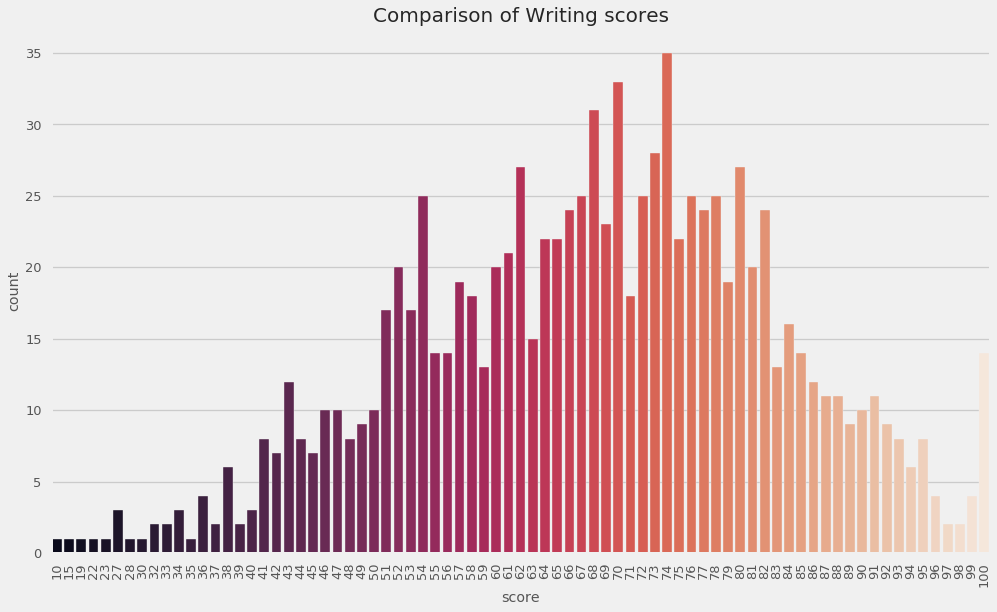

In [43]:
sns.countplot(x=data['writing score'], palette = 'rocket')
plt.title('Comparison of Writing scores', fontweight = 30, fontsize = 20)
plt.xlabel('score')
plt.ylabel('count')
plt.xticks(rotation = 90)
plt.show()

## 12. Comparing data of different features
* crosstab in pandas
* countplot in seaborn (separating hue with another feature)

In [44]:
plt.rcParams['figure.figsize'] = (15, 9)

**Gender vs Race/Ethnicity**

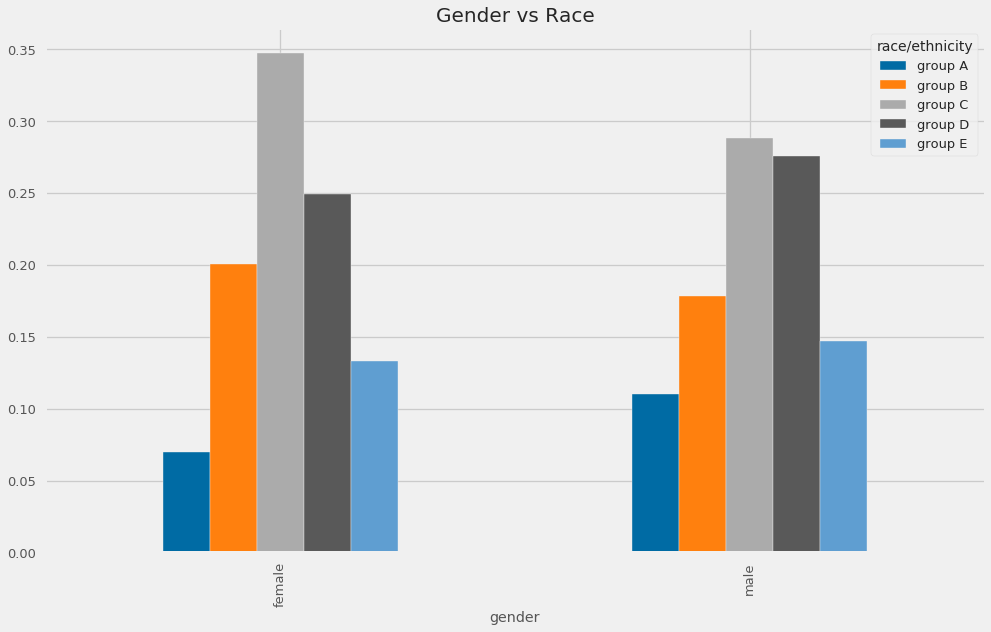

In [45]:
x = pd.crosstab(data['gender'], data['race/ethnicity'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = False)
plt.title('Gender vs Race', fontweight = 30, fontsize = 20)
plt.show()

**Race/Ethnicity vs Parental level of education**

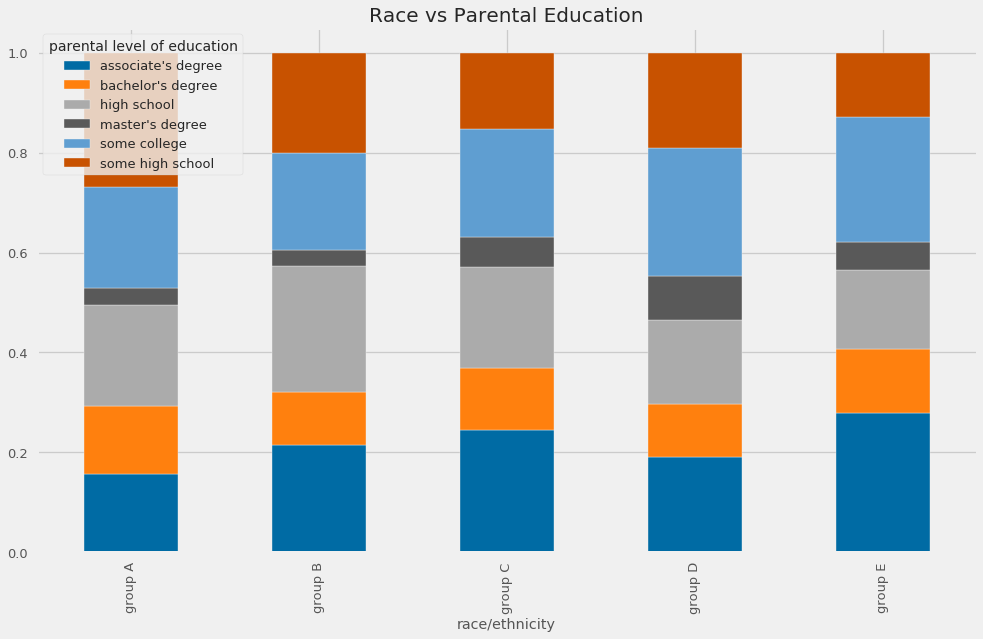

In [46]:
x = pd.crosstab(data['race/ethnicity'], data['parental level of education'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = 'True')
plt.title('Race vs Parental Education', fontweight = 30, fontsize = 20)
plt.show()

**Parental level of education vs Test preparation course**

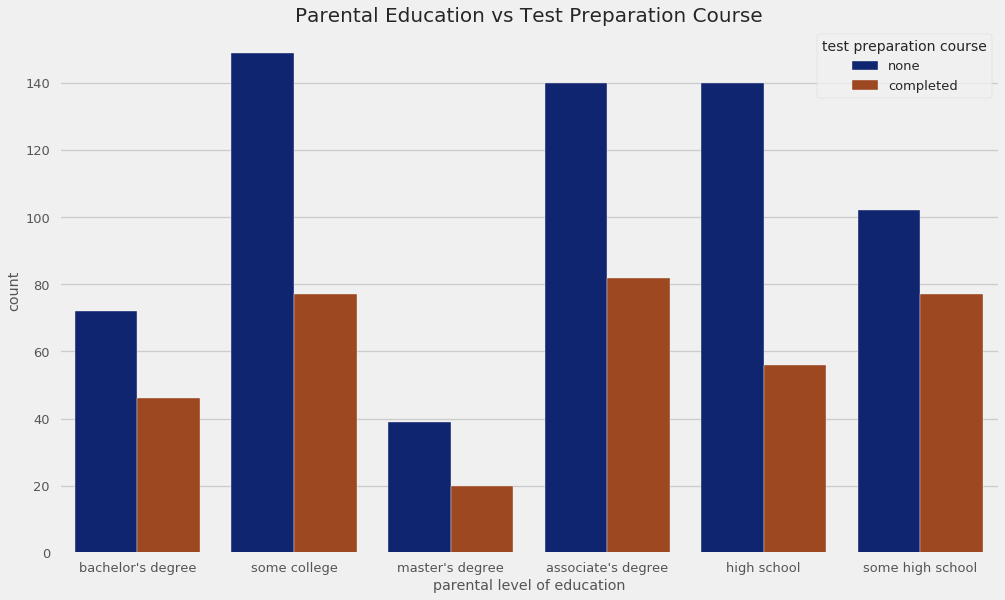

In [47]:
sns.countplot(x = 'parental level of education', data = data, hue = 'test preparation course', palette = 'dark')
plt.title('Parental Education vs Test Preparation Course', fontweight = 30, fontsize = 20)
plt.show()

**Race/Ethnicity vs Test preparation course**

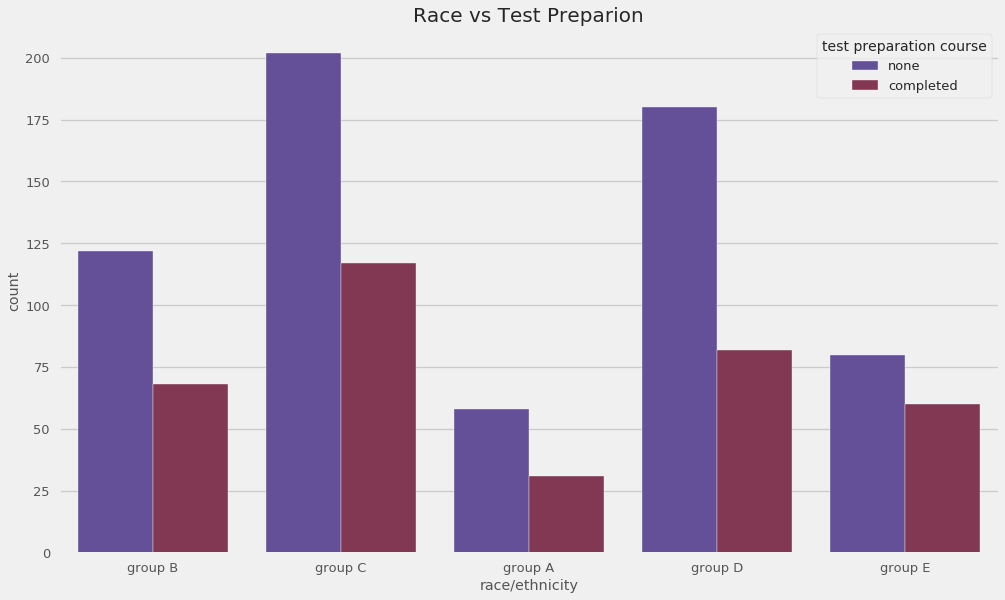

In [48]:
sns.countplot(x = 'race/ethnicity', data = data,  hue = 'test preparation course', palette = 'twilight')
plt.title('Race vs Test Preparion', fontweight = 30, fontsize = 20)
plt.show()

## 13. Plotting graphs for various scenarios

**Comparing number of students who passed and failed in Maths**

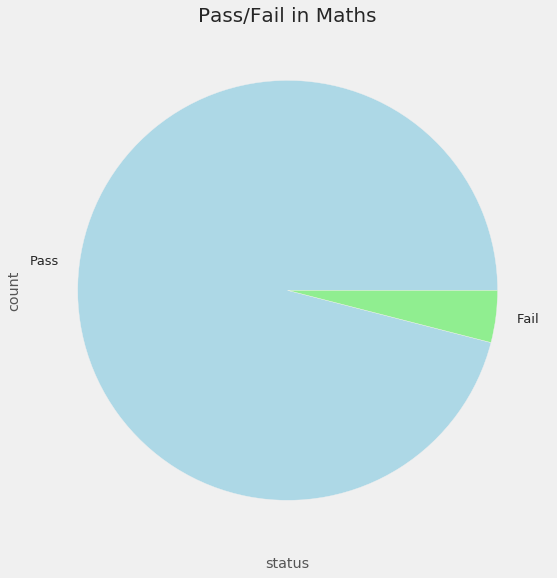

In [49]:
passmarks = 40

data['pass_math'] = np.where(data['math score']< passmarks, 'Fail', 'Pass')
data['pass_math'].value_counts().plot.pie(colors = ['lightblue', 'lightgreen'])
plt.title('Pass/Fail in Maths', fontweight = 30, fontsize = 20)
plt.xlabel('status')
plt.ylabel('count')
plt.show()

**Comparing number of students who passed and failed in Reading**

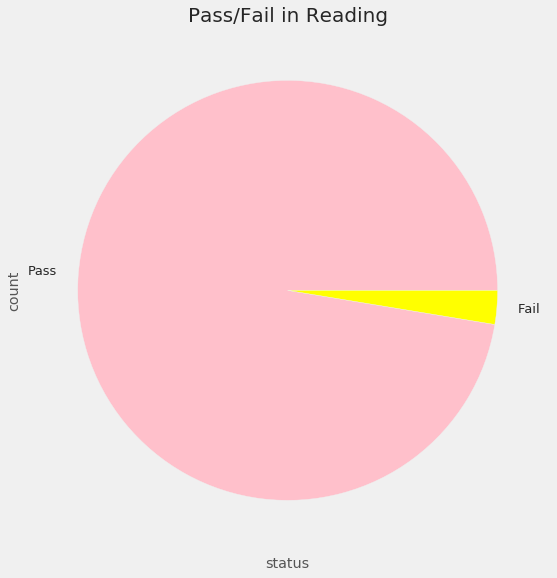

In [50]:
data['pass_reading'] = np.where(data['reading score']< passmarks, 'Fail', 'Pass')
data['pass_reading'].value_counts(dropna = False).plot.pie(colors = ['pink', 'yellow'])
plt.title('Pass/Fail in Reading', fontweight = 30, fontsize = 20)
plt.xlabel('status')
plt.ylabel('count')
plt.show()

**Comparing number of students who passed and failed in Writing**

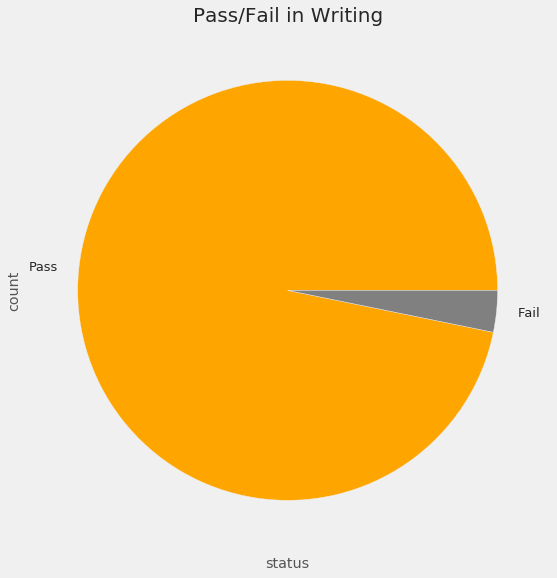

In [51]:
data['pass_writing'] = np.where(data['writing score']< passmarks, 'Fail', 'Pass')
data['pass_writing'].value_counts(dropna = False).plot.pie(colors = ['orange', 'gray'])
plt.title('Pass/Fail in Writing', fontweight = 30, fontsize = 20)
plt.xlabel('status')
plt.ylabel('count')
plt.show()

**Comparing total score of all the students**

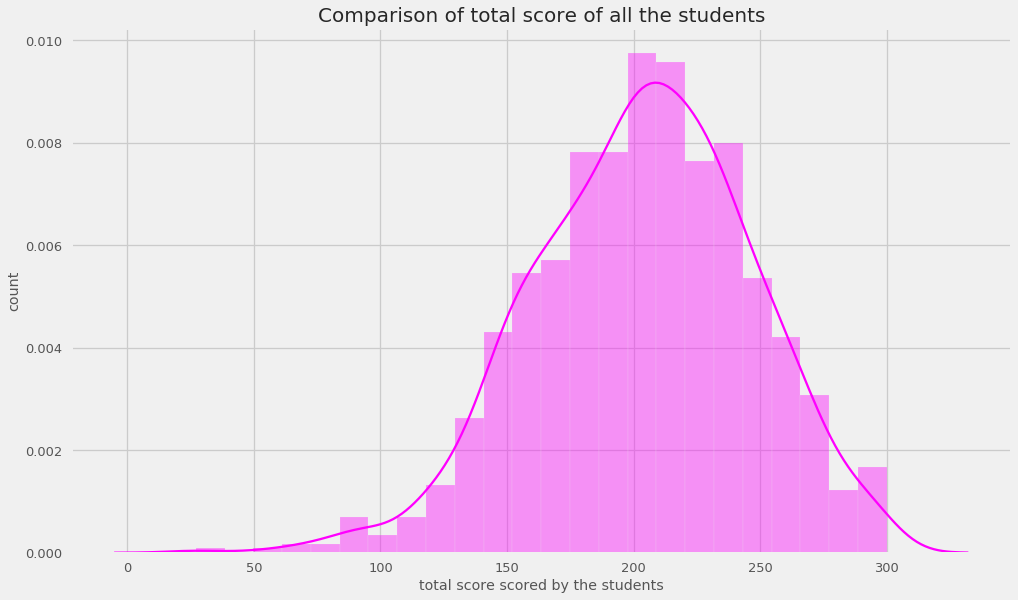

In [52]:
warnings.filterwarnings('ignore')

data['total_score'] = data['math score'] + data['reading score'] + data['writing score']
sns.distplot(data['total_score'], color = 'magenta')
plt.title('Comparison of total score of all the students', fontweight = 30, fontsize = 20)
plt.xlabel('total score scored by the students')
plt.ylabel('count')
plt.show()


**Comparing percentage of all the students**

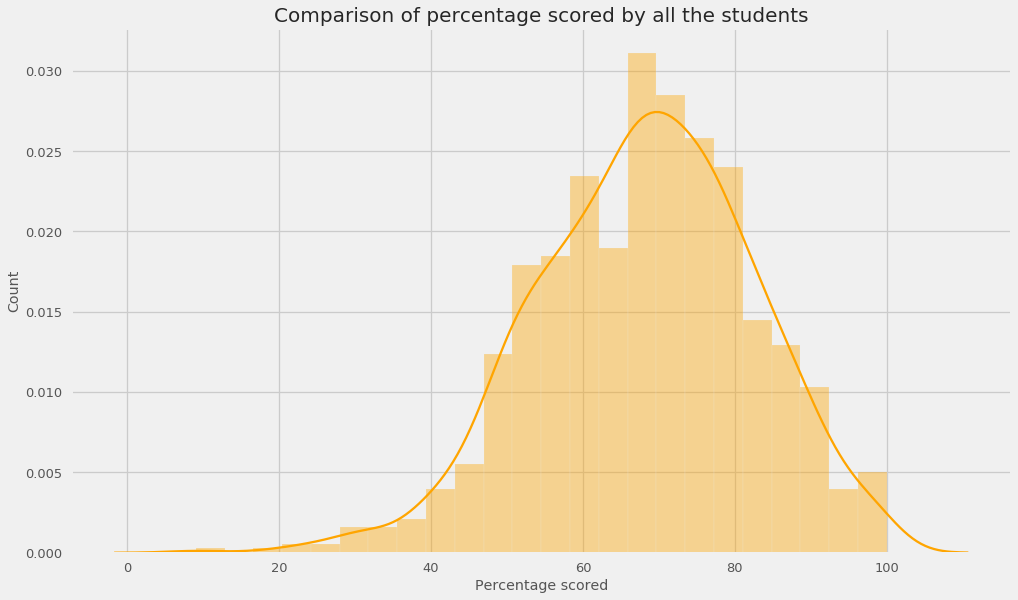

In [53]:
from math import *
warnings.filterwarnings('ignore')

data['percentage'] = data['total_score']/3

for i in range(0, 1000):
    data['percentage'][i] = ceil(data['percentage'][i])

sns.distplot(data['percentage'], color = 'orange')

plt.title('Comparison of percentage scored by all the students', fontweight = 30, fontsize = 20)
plt.xlabel('Percentage scored')
plt.ylabel('Count')
plt.show()

**Comparing students who have passed or failed overall**

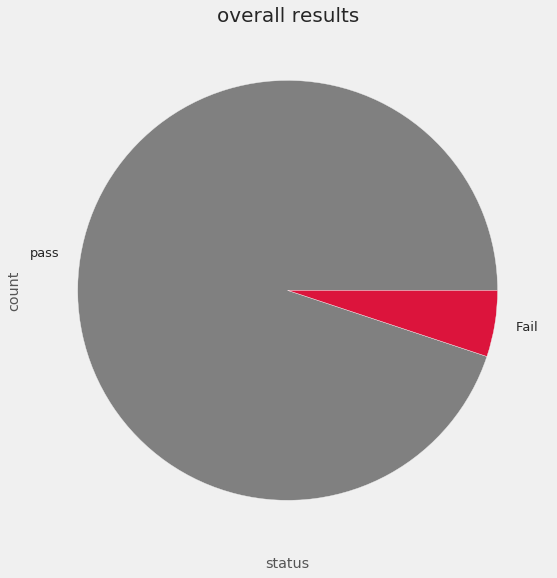

In [54]:
data['status'] = data.apply(lambda x : 'Fail' if x['pass_math'] == 'Fail' or 
                           x['pass_reading'] == 'Fail' or x['pass_writing'] == 'Fail'
                           else 'pass', axis = 1)

data['status'].value_counts(dropna = False).plot.pie(colors = ['grey', 'crimson'])
plt.title('overall results', fontweight = 30, fontsize = 20)
plt.xlabel('status')
plt.ylabel('count')
plt.show()

**Visualising the grades of the students**

In [55]:
## Function to get the grades
def getgrade(percentage, status):
    if status == 'Fail':
        return 'E'
    if(percentage >= 90):
        return 'O'
    if(percentage >= 80):
        return 'A'
    if(percentage >= 70):
        return 'B'
    if(percentage >= 60):
        return 'C'
    if(percentage >= 40):
        return 'D'
    else :
        return 'E'

data['grades'] = data.apply(lambda x: getgrade(x['percentage'], x['status']), axis = 1 )

data['grades'].value_counts()

B    260
C    252
D    223
A    156
O     58
E     51
Name: grades, dtype: int64

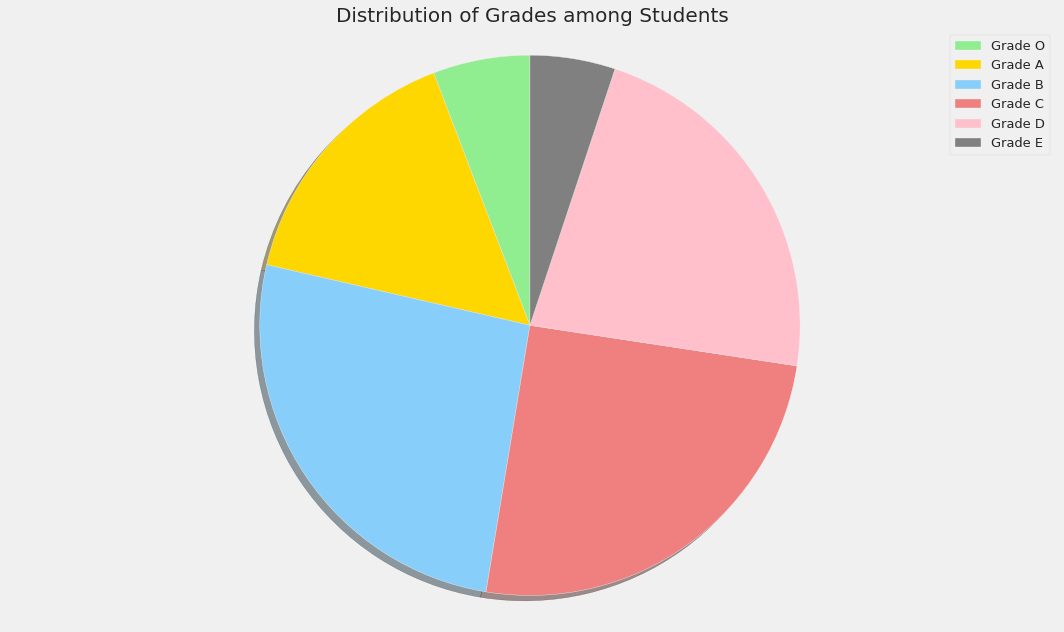

In [56]:
labels = ['Grade O', 'Grade A', 'Grade B', 'Grade C', 'Grade D', 'Grade E']
sizes = [58, 156, 260, 252, 223, 51]
colors = ['lightgreen', 'gold', 'lightskyblue', 'lightcoral', 'pink', 'grey']
explode = (0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001)

patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels)
plt.title('Distribution of Grades among Students', fontweight = 30, fontsize = 20)
plt.axis('equal')
plt.tight_layout()
plt.show()

**Parental Education vs Student's Grades**

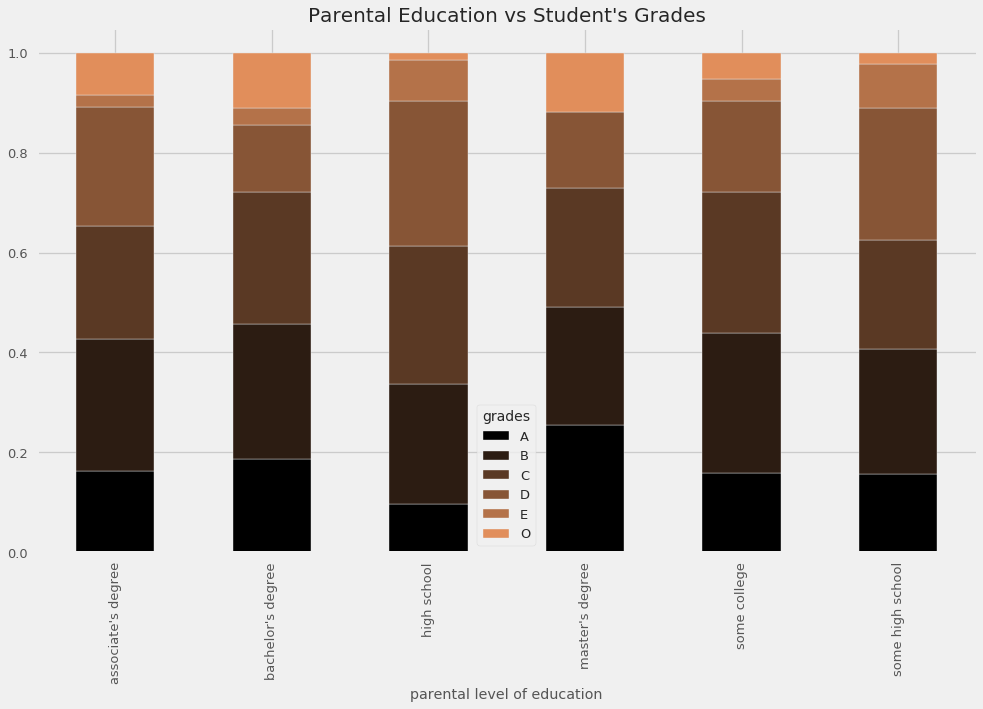

In [57]:
x = pd.crosstab(data['parental level of education'], data['grades'])
color = plt.cm.copper(np.linspace(0, 1, 8))
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, color = color)
plt.title("Parental Education vs Student's Grades", fontweight = 30, fontsize = 20)
plt.show()

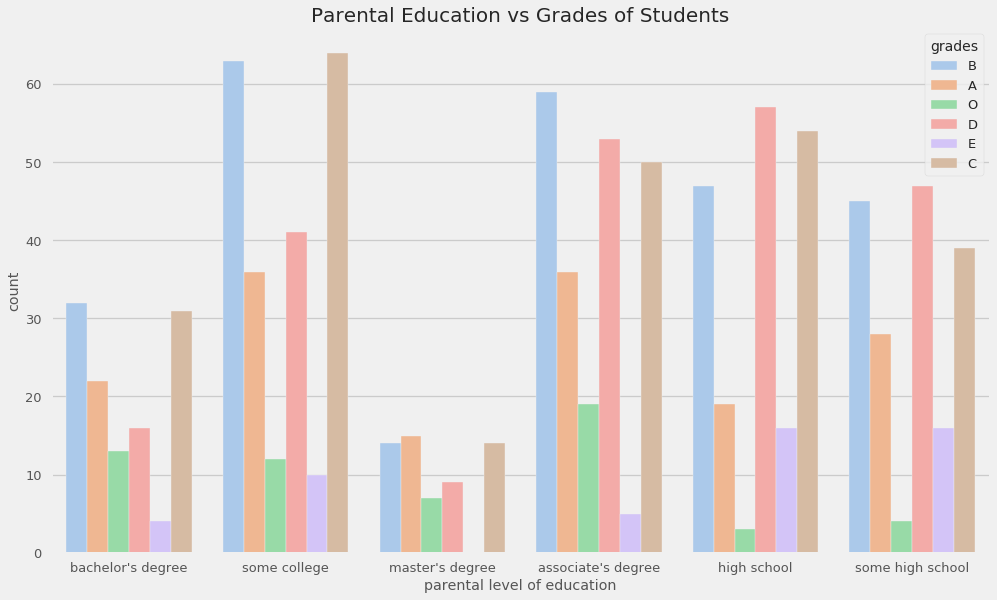

In [58]:
## Using countplot in seaborn
sns.countplot(x = data['parental level of education'], data = data, hue = data['grades'], palette = 'pastel')
plt.title('Parental Education vs Grades of Students', fontsize = 20, fontweight = 30)
plt.show()

**Gender vs Student's Grades**

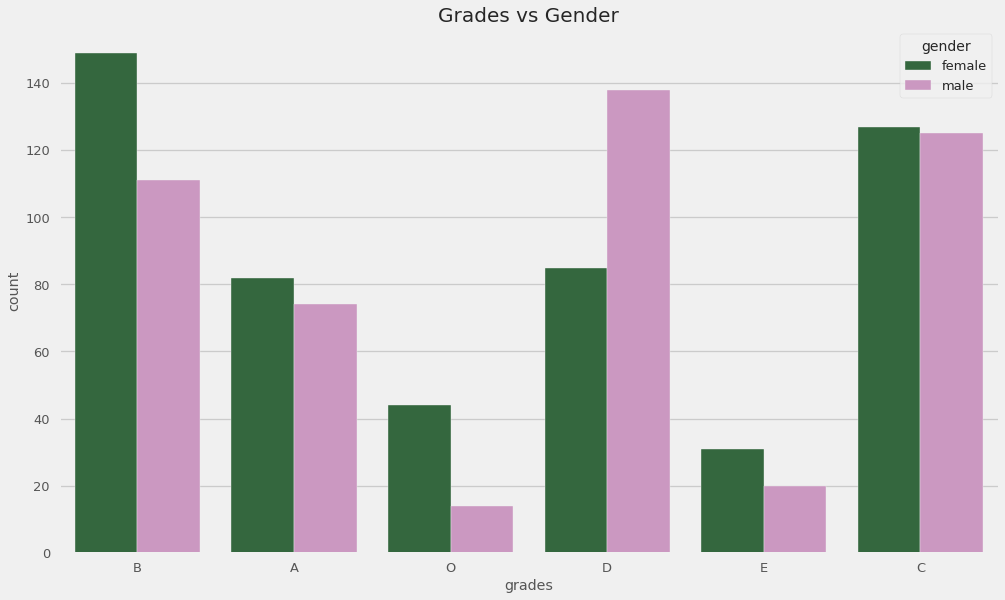

In [59]:
sns.countplot(x = data['grades'], data = data, hue = data['gender'], palette = 'cubehelix')
plt.title('Grades vs Gender', fontweight = 30, fontsize = 20)
plt.show()

**Test Preparation Course vs Student's Grades**

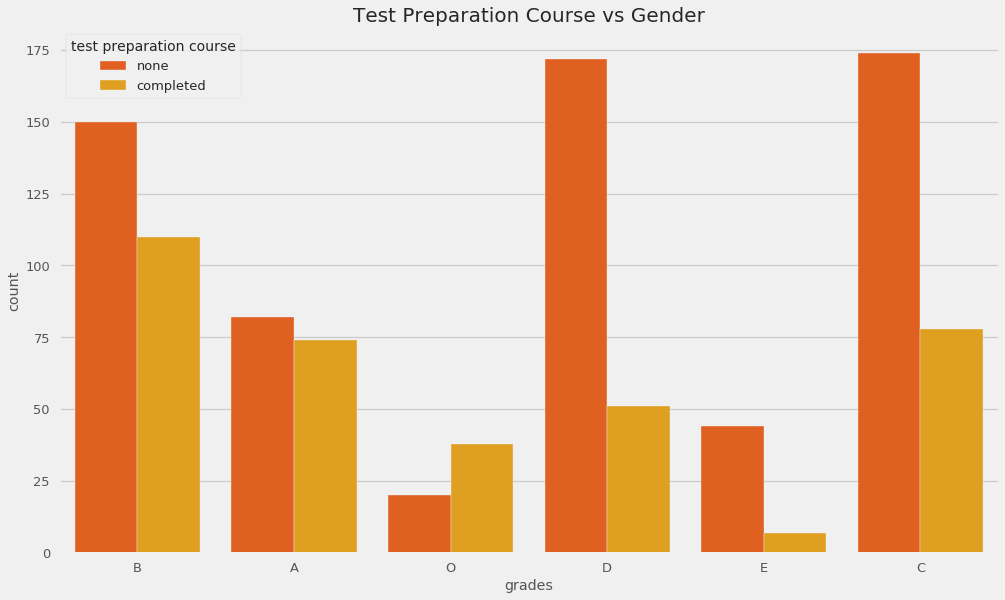

In [60]:
sns.countplot(x = data['grades'], data = data, hue = data['test preparation course'], palette = 'autumn')
plt.title('Test Preparation Course vs Gender', fontweight = 30, fontsize = 20)
plt.show()

**Race/Ethnicity vs Student's Grades**

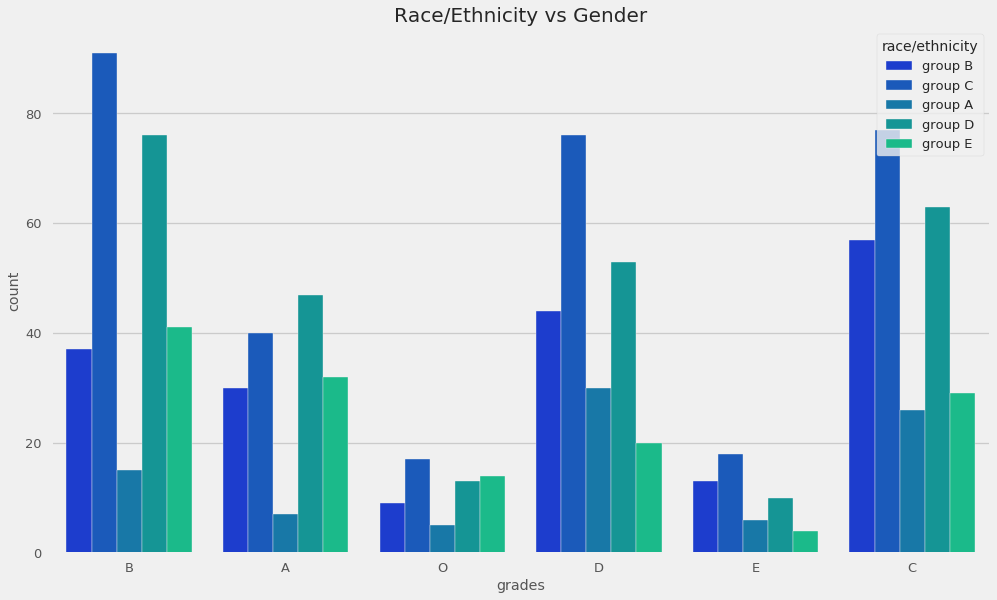

In [61]:
sns.countplot(x = data['grades'], data = data, hue = data['race/ethnicity'], palette = 'winter')
plt.title('Race/Ethnicity vs Gender', fontweight = 30, fontsize = 20)
plt.show()

## 14. Label Encoding

In [62]:
from sklearn.preprocessing import LabelEncoder

# creating an encoder
le = LabelEncoder()

# label encoding for test preparation course
data['test preparation course'] = le.fit_transform(data['test preparation course'])

# label encoding for lunch
data['lunch'] = le.fit_transform(data['lunch'])

# label encoding for race/ethnicity (we have to map values to each of the categories)
data['race/ethnicity'] = data['race/ethnicity'].replace('group A', 1)
data['race/ethnicity'] = data['race/ethnicity'].replace('group B', 2)
data['race/ethnicity'] = data['race/ethnicity'].replace('group C', 3)
data['race/ethnicity'] = data['race/ethnicity'].replace('group D', 4)
data['race/ethnicity'] = data['race/ethnicity'].replace('group E', 5)

# label encoding for parental level of education
data['parental level of education'] = le.fit_transform(data['parental level of education'])

#label encoding for gender
data['gender'] = le.fit_transform(data['gender'])

# label encoding for pass_math
data['pass_math'] = le.fit_transform(data['pass_math'])

# label encoding for pass_reading
data['pass_reading'] = le.fit_transform(data['pass_reading'])

# label encoding for pass_writing
data['pass_writing'] = le.fit_transform(data['pass_writing'])

# label encoding for status
data['status'] = le.fit_transform(data['status'])

## 15. Data Preparation
* Dependent variable - Grades of the student
* Independent varuable - All other factors

In [63]:
x = data.iloc[:,:14]
y = data.iloc[:,14]

print(x.shape)
print(y.shape)

(1000, 14)
(1000,)


Splitting into test and train dataset

In [64]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 45)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(750, 14)
(750,)
(250, 14)
(250,)


Data Transformation - Creating a scalar and fitting the independent variables into the scalar

In [65]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()
x_train = mm.fit_transform(x_train)
x_test = mm.transform(x_test)

## 16. Modelling (Fitting and evaluation models)

In [66]:
from sklearn.metrics import confusion_matrix
plt.rcParams['figure.figsize'] = (5, 5)

### Logistic Regression 

In [67]:
from sklearn.linear_model import  LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy : {:.2f} %".format(model.score(x_train, y_train)*100))
print("Testing Accuracy : {:.2f} %".format(model.score(x_test, y_test)*100))

Training Accuracy : 85.07 %
Testing Accuracy : 81.20 %


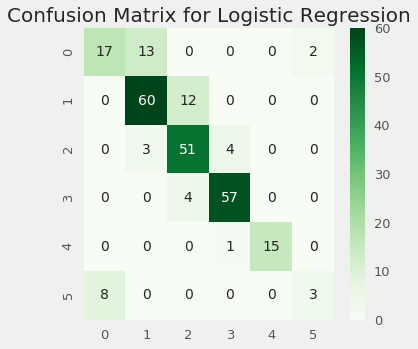

In [68]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = 'Greens')
plt.title('Confusion Matrix for Logistic Regression', fontweight = 30, fontsize = 20)
plt.show()

### Naive Bayes

In [69]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy : {:.2f} %".format(model.score(x_train, y_train)*100))
print("Testing Accuracy : {:.2f} %".format(model.score(x_test, y_test)*100))

Training Accuracy : 97.60 %
Testing Accuracy : 96.00 %


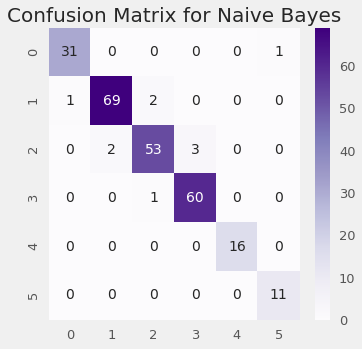

In [70]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = 'Purples')
plt.title('Confusion Matrix for Naive Bayes', fontweight = 30, fontsize = 20)
plt.show()

### Random Forest

In [71]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy : {:.2f} %".format(model.score(x_train, y_train)*100))
print("Testing Accuracy : {:.2f} %".format(model.score(x_test, y_test)*100))

Training Accuracy : 100.00 %
Testing Accuracy : 100.00 %


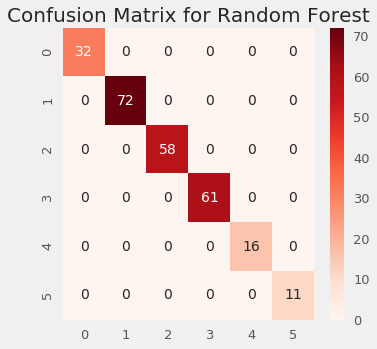

In [72]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = 'Reds')
plt.title('Confusion Matrix for Random Forest', fontweight = 30, fontsize = 20)
plt.show()

### Support Vector Machines

In [73]:
from sklearn import svm

model = svm.SVC(kernel='linear')
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy : {:.2f} %".format(model.score(x_train, y_train)*100))
print("Testing Accuracy : {:.2f} %".format(model.score(x_test, y_test)*100))

Training Accuracy : 93.47 %
Testing Accuracy : 92.00 %


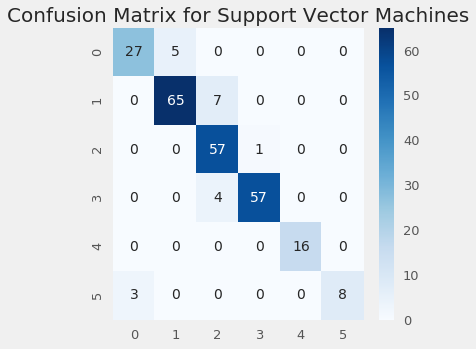

In [74]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = 'Blues')
plt.title('Confusion Matrix for Support Vector Machines', fontweight = 30, fontsize = 20)
plt.show()

### K Nearest Neighbours

In [75]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy : {:.2f} %".format(model.score(x_train, y_train)*100))
print("Testing Accuracy : {:.2f} %".format(model.score(x_test, y_test)*100))

Training Accuracy : 84.67 %
Testing Accuracy : 69.60 %


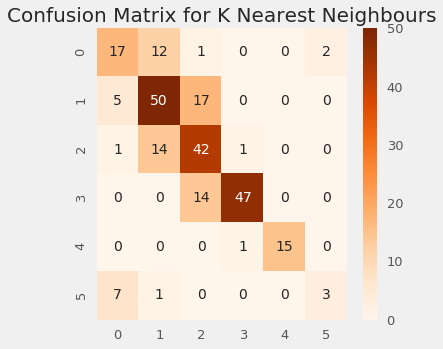

In [76]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = 'Oranges')
plt.title('Confusion Matrix for K Nearest Neighbours', fontweight = 30, fontsize = 20)
plt.show()

## 17. Radial Visualization for Target

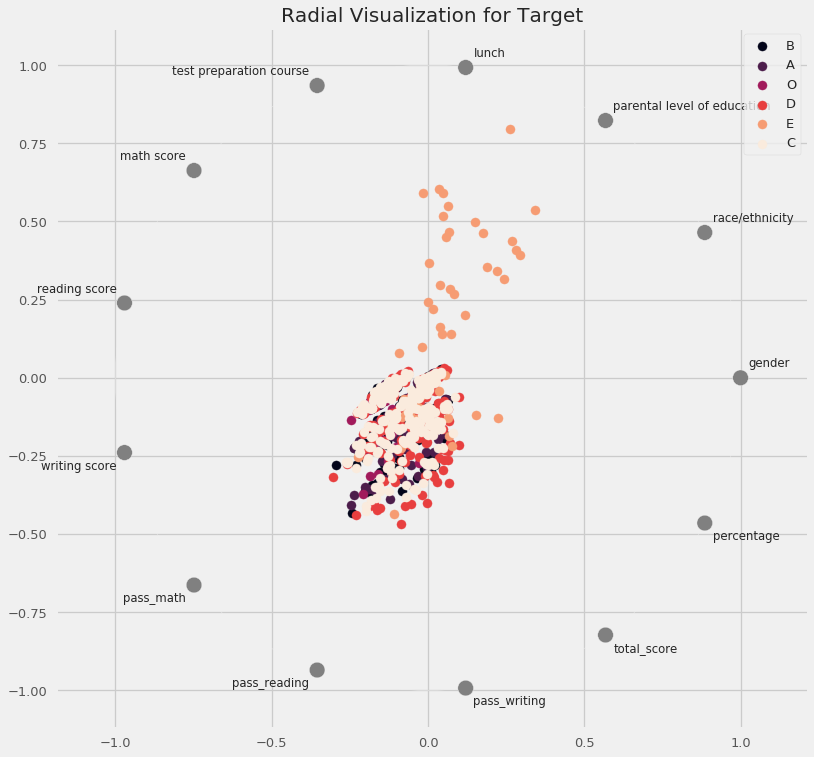

In [77]:
from pandas.plotting import radviz
fig, ax = plt.subplots(figsize=(12, 12))
new_df = x.copy()
new_df["status"] = y
radviz(new_df, "status", ax=ax, colormap="rocket")
plt.title('Radial Visualization for Target', fontsize = 20)
plt.show()

It gives a clear Idea that Students getting very low grades have high correlation on Lunch and Parental Education